## frathom
## Homework2 Part3

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as tf
import torchvision
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import helper
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import TensorDataset
import glob
import librosa
import math

In [53]:
import IPython.display as ipd

In [54]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [55]:
print(torch.cuda.is_available())

True


In [56]:
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [57]:
cifar_train[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [58]:
len_train = len(cifar_train)
index = list(range(len_train))
val_size=5000

In [59]:
train_in,val_in=index[val_size:],index[:val_size]
cifar_train=torch.utils.data.Subset(cifar_train, train_in)
val=torch.utils.data.Subset(cifar_train,val_in)

In [60]:
train_base = torch.utils.data.DataLoader(cifar_train, batch_size=1024, num_workers=2)
val_base = torch.utils.data.DataLoader(val, batch_size=1024, num_workers=2)

In [61]:
class CNN_base(nn.Module):
  def __init__(self):
    super(CNN_base,self).__init__()
    self.first_conv=nn.Conv2d(3,10,5)
    nn.init.kaiming_normal_(self.first_conv.weight)
    self.relu=nn.ReLU()
    self.pooling=nn.MaxPool2d(2,stride=2)
    self.second_conv=nn.Conv2d(10,10,5)
    nn.init.kaiming_normal_(self.second_conv.weight)
    self.fc1=nn.Linear(10*5*5,20)
    nn.init.kaiming_normal_(self.fc1.weight)
    self.fc2=nn.Linear(20,10)
    nn.init.kaiming_normal_(self.fc2.weight)
  
  def Forward_prop(self,x):
    x1=self.pooling(self.relu(self.first_conv(x)))
    x2=self.pooling(self.relu(self.second_conv(x1)))
    x2=x2.view(-1,10*5*5)
    x3=self.relu(self.fc1(x2))
    out=self.fc2(x3)
    return out

In [62]:
cnn_base=CNN_base().to(device)

In [63]:
loss=nn.CrossEntropyLoss()
param=cnn_base.parameters()
optimize=torch.optim.Adam(param,lr=0.001)
#no_of_epochs=40

In [64]:
# Training the Feedforward Neural Network
def train_model_base():
    for num,dat in enumerate(train_base):

      im,la=dat
      im=im.to(device)
      la=la.to(device)
      ff_out=cnn_base.Forward_prop(im)
      losses=loss(ff_out,la)
      optimize.zero_grad()
      losses.backward()
      optimize.step()
   
    #print("epoch {} is done".format(ep))






In [65]:
# Testing the Feedforward Neural Network

def validation_base():
  length=0
  correct_count=0
  with torch.no_grad():
    for dat in val_base:
      im,la=dat
      test_out=cnn_base.Forward_prop(im.to(device))
      _,pred=torch.max(test_out.data,1)
      length+=la.size(0)
      correct_count+=(pred.cpu()==la).sum().item()
  return correct_count/val_size

In [66]:
def accuracy_calculation(no_of_epochs):
  accuracy=[]
  for i in range(no_of_epochs):
    train_model_base()
    va=validation_base()
    accuracy.append(va)
    print("epoch {} is done and accuracy is {}".format(i,va))
  return accuracy

In [67]:
acc_base=accuracy_calculation(200)

epoch 0 is done and accuracy is 0.297
epoch 1 is done and accuracy is 0.3662
epoch 2 is done and accuracy is 0.41
epoch 3 is done and accuracy is 0.4356
epoch 4 is done and accuracy is 0.4568
epoch 5 is done and accuracy is 0.4704
epoch 6 is done and accuracy is 0.4788
epoch 7 is done and accuracy is 0.4918
epoch 8 is done and accuracy is 0.5014
epoch 9 is done and accuracy is 0.5068
epoch 10 is done and accuracy is 0.5158
epoch 11 is done and accuracy is 0.5258
epoch 12 is done and accuracy is 0.5346
epoch 13 is done and accuracy is 0.5424
epoch 14 is done and accuracy is 0.5478
epoch 15 is done and accuracy is 0.5578
epoch 16 is done and accuracy is 0.5582
epoch 17 is done and accuracy is 0.5664
epoch 18 is done and accuracy is 0.5702
epoch 19 is done and accuracy is 0.5736
epoch 20 is done and accuracy is 0.5776
epoch 21 is done and accuracy is 0.5786
epoch 22 is done and accuracy is 0.5796
epoch 23 is done and accuracy is 0.5812
epoch 24 is done and accuracy is 0.583
epoch 25 is do

Text(0, 0.5, 'Validation Accuracy')

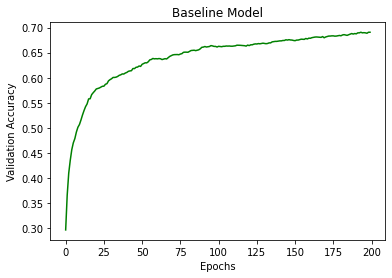

In [68]:
plt.plot(list(range(200)),acc_base,'g')
plt.title('Baseline Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

In [9]:
class adj_bright():
    def __init__(self, fac):
        self.fac = fac

    def __call__(self, x):
        a = self.fac
        return tf.adjust_brightness(x, a)

In [10]:
brightness_transforms=adj_bright(1.1)
darkness_transforms=adj_bright(0.9)

In [11]:
transform1 = transforms.Compose(
    [
     transforms.Resize(32,32),
     brightness_transforms,
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
brighter_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform1)

Files already downloaded and verified


In [12]:
transform2 = transforms.Compose(
    [
     transforms.Resize(32,32),
     darkness_transforms,
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
darker_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform2)

Files already downloaded and verified


In [13]:
transform3 = transforms.Compose(
    [
     transforms.Resize(32,32),
     transforms.transforms.RandomHorizontalFlip(p=1),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])
flipped_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform3)

Files already downloaded and verified


In [14]:
len_train = len(flipped_train)
index = list(range(len_train))
val_size=5000

In [15]:
b_tr,val_btr=index[val_size:],index[:val_size]
bri_train=torch.utils.data.Subset(brighter_train, b_tr)
dar_train=torch.utils.data.Subset(darker_train,b_tr)
fli_train=torch.utils.data.Subset(flipped_train,b_tr)

In [16]:
aug_dat=torch.utils.data.ConcatDataset((bri_train,dar_train,fli_train,cifar_train))
aug_train = torch.utils.data.DataLoader(aug_dat, batch_size=1024, num_workers=2)
val = torch.utils.data.DataLoader(val, batch_size=1024, num_workers=2)

In [21]:
b = torch.utils.data.DataLoader(bri_train, batch_size=2, num_workers=2)
d = torch.utils.data.DataLoader(dar_train, batch_size=2, num_workers=2)
f = torch.utils.data.DataLoader(fli_train, batch_size=2, num_workers=2)
o = torch.utils.data.DataLoader(cifar_train, batch_size=2, num_workers=2)

def print_img(i):
    i = i / 2 + 0.5     
    npi = i.numpy()
    plt.imshow(np.transpose(npi, (1, 2, 0)))
    plt.show()


the original images


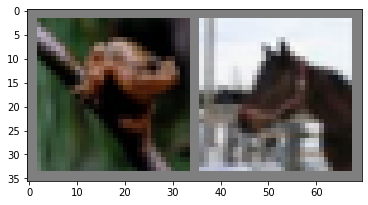

In [22]:

dataiter = iter(o)
img, labe = dataiter.next()
print("the original images")
print_img(torchvision.utils.make_grid(img))

brighter images


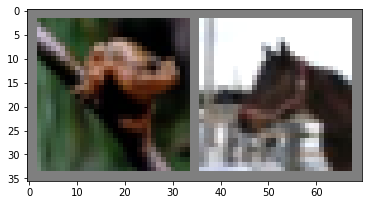

In [23]:

dataiter = iter(b)
img, labe = dataiter.next()
print("brighter images")
print_img(torchvision.utils.make_grid(img))

darker images


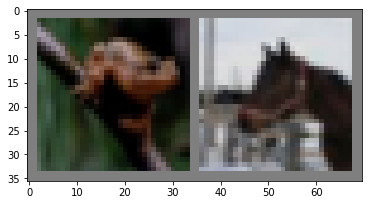

In [24]:

dataiter = iter(d)
img, labe = dataiter.next()
print("darker images")
print_img(torchvision.utils.make_grid(img))

flipped images


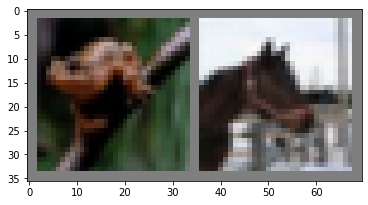

In [25]:

dataiter = iter(f)
img, labe = dataiter.next()
print("flipped images")
print_img(torchvision.utils.make_grid(img))

In [26]:
aug_dat[0]

(tensor([[[-0.4824, -0.6549, -0.5529,  ..., -0.5451, -0.4353, -0.3725],
          [-0.0353, -0.5059, -0.5059,  ..., -0.5373, -0.4275, -0.3804],
          [ 0.4667,  0.0196, -0.3098,  ..., -0.5216, -0.3961, -0.3804],
          ...,
          [-0.2157, -0.4980, -0.6157,  ..., -0.7255, -0.7804, -0.7882],
          [-0.1529, -0.4510, -0.5294,  ..., -0.6392, -0.6392, -0.6549],
          [-0.0980, -0.3961, -0.4980,  ..., -0.6314, -0.6078, -0.6157]],
 
         [[-0.2941, -0.4196, -0.3020,  ..., -0.6314, -0.5294, -0.4667],
          [-0.0196, -0.3882, -0.3020,  ..., -0.6000, -0.5059, -0.4667],
          [ 0.3882,  0.0118, -0.2392,  ..., -0.5686, -0.4588, -0.4510],
          ...,
          [-0.0275, -0.2863, -0.4431,  ..., -0.5216, -0.6078, -0.6392],
          [ 0.0196, -0.2627, -0.3569,  ..., -0.3882, -0.4196, -0.4510],
          [ 0.0510, -0.2078, -0.3255,  ..., -0.4353, -0.3961, -0.3882]],
 
         [[-0.5373, -0.6941, -0.5529,  ..., -0.5686, -0.4745, -0.4196],
          [-0.0196, -0.5216,

In [27]:
class CNN_Aug(nn.Module):
  def __init__(self):
    super(CNN_Aug,self).__init__()
    self.first_conv=nn.Conv2d(3,10,5)
    nn.init.kaiming_normal_(self.first_conv.weight)
    self.relu=nn.ReLU()
    self.pooling=nn.MaxPool2d(2,stride=2)
    self.second_conv=nn.Conv2d(10,10,5)
    nn.init.kaiming_normal_(self.second_conv.weight)
    self.fc1=nn.Linear(10*5*5,20)
    nn.init.kaiming_normal_(self.fc1.weight)
    self.fc2=nn.Linear(20,10)
    nn.init.kaiming_normal_(self.fc2.weight)
  
  def Forward_prop(self,x):
    x1=self.pooling(self.relu(self.first_conv(x)))
    x2=self.pooling(self.relu(self.second_conv(x1)))
    x2=x2.view(-1,10*5*5)
    x3=self.relu(self.fc1(x2))
    out=self.fc2(x3)
    return out

In [28]:
cnn_aug=CNN_Aug().to(device)

In [29]:
loss=nn.CrossEntropyLoss()
param=cnn_aug.parameters()
optimize=torch.optim.Adam(param,lr=0.001)
#no_of_epochs=40

In [30]:
# Training the Feedforward Neural Network
def train_model():
    for num,dat in enumerate(aug_train):

      im,la=dat
      im=im.cuda()
      la=la.cuda()
      ff_out=cnn_aug.Forward_prop(im)
      losses=loss(ff_out,la)
      optimize.zero_grad()
      losses.backward()
      optimize.step()
   
    #print("epoch {} is done".format(ep))






In [31]:
# Testing the Feedforward Neural Network

def validation():
  length=0
  correct_count=0
  with torch.no_grad():
    for dat in val:
      im,la=dat
      test_out=cnn_aug.Forward_prop(im.cuda())
      _,pred=torch.max(test_out.data,1)
      length+=la.size(0)
      correct_count+=(pred.cpu()==la).sum().item()
  return correct_count/val_size

In [32]:
def accuracy_calculation(no_of_epochs):
  accuracy=[]
  for i in range(no_of_epochs):
    train_model()
    va=validation()
    accuracy.append(va)
    print("epoch {} is done and accuracy is {}".format(i,va))
  return accuracy

In [33]:
acc=accuracy_calculation(200)

epoch 0 is done and accuracy is 0.4326
epoch 1 is done and accuracy is 0.5036
epoch 2 is done and accuracy is 0.5354
epoch 3 is done and accuracy is 0.551
epoch 4 is done and accuracy is 0.5678
epoch 5 is done and accuracy is 0.582
epoch 6 is done and accuracy is 0.5928
epoch 7 is done and accuracy is 0.6036
epoch 8 is done and accuracy is 0.6162
epoch 9 is done and accuracy is 0.6208
epoch 10 is done and accuracy is 0.624
epoch 11 is done and accuracy is 0.6286
epoch 12 is done and accuracy is 0.6352
epoch 13 is done and accuracy is 0.6406
epoch 14 is done and accuracy is 0.6446
epoch 15 is done and accuracy is 0.646
epoch 16 is done and accuracy is 0.6492
epoch 17 is done and accuracy is 0.652
epoch 18 is done and accuracy is 0.6506
epoch 19 is done and accuracy is 0.6548
epoch 20 is done and accuracy is 0.6554
epoch 21 is done and accuracy is 0.658
epoch 22 is done and accuracy is 0.6612
epoch 23 is done and accuracy is 0.6626
epoch 24 is done and accuracy is 0.6638
epoch 25 is done

Text(0, 0.5, 'Validation Accuracy')

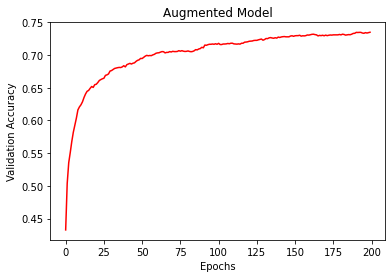

In [34]:
plt.plot(list(range(200)),acc,'r')
plt.title('Augmented Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

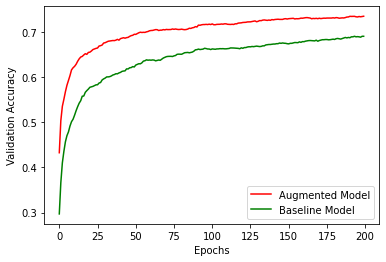

In [70]:
plt.plot(list(range(200)),acc,'r')
plt.plot(list(range(200)),acc_base,'g')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['Augmented Model','Baseline Model'])
plt.show()

#### As seen the model with augmented images added to it performs better than the original model. A reason for this is that the original model might be overfitting on the smaller image dataset hence generalises poorly on new images(the validation set). Since the augmented model has been exposed to more varietes of images it does better on the validation data.